      Match_Up   Game_Date W/L Home/Away
0    LAL @ NOP  05/16/2021   W      Away
1    LAL @ IND  05/15/2021   W      Away
2  LAL vs. HOU  05/12/2021   W      Home
3  LAL vs. NYK  05/11/2021   W      Home
4  LAL vs. PHX  05/09/2021   W      Home
5    LAL @ POR  05/07/2021   L      Away
6    LAL @ LAC  05/06/2021   L      Away
7  LAL vs. DEN  05/03/2021   W      Home
8  LAL vs. TOR  05/02/2021   L      Home
9  LAL vs. SAC  04/30/2021   L      Home
0.5539112050739958
0.41139240506329117


Text(0, 0.5, 'Number of Games')

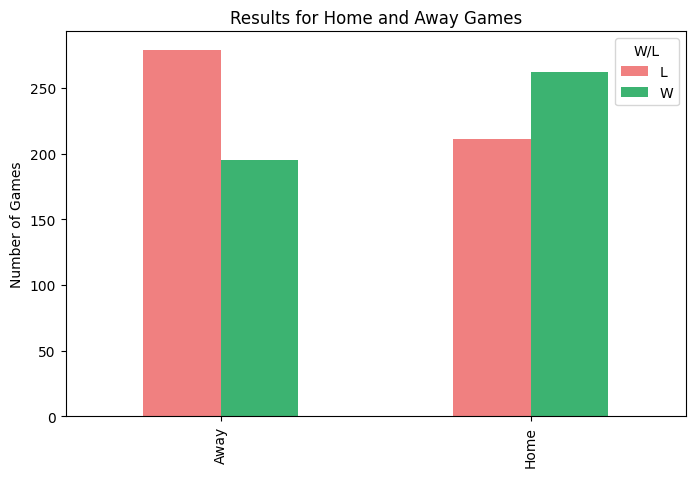

In [61]:
import pandas as pd, json
import matplotlib.pyplot as plt


cols = ["MATCH UP", "GAME DATE", "W/L"]
data = pd.read_csv("Lakers2009-2021.csv", usecols = cols)

data.rename(columns = {
    'MATCH\xa0UP' : 'Match_Up',
    'GAME\xa0DATE' : 'Game_Date'
}, inplace=True)

def home_away(x):
    x = x.strip().lower()
    if "vs." in x:
        return "Home"
    elif "@" in x: 
        return "Away"

data["Home/Away"] = data["Match_Up"].apply(home_away)
print(data.head(10))


home_wins = data[(data['Home/Away'] == 'Home') & (data['W/L'] == 'W')]
home_total = data[data['Home/Away'] == 'Home']
home_win_pct = len(home_wins) / len(home_total)
print(home_win_pct)

away_wins = data[(data['Home/Away'] == 'Away') & (data['W/L'] == 'W')]
away_total = data[data['Home/Away'] == 'Away']
away_win_pct = len(away_wins) / len(away_total)
print(away_win_pct)


summary = pd.crosstab(data['Home/Away'], data['W/L'])
summary.plot(kind='bar', figsize=(8,5), color=['lightcoral', 'mediumseagreen'])
plt.title('Results for Home and Away Games')
plt.xlabel(None)
plt.ylabel('Number of Games')
